# Import Statements

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

# Load and Prepare Data

#### Format of the data
- last column of the data frame must contain the label and it must also be called "label"
- there should be no missing values in the data frame

In [111]:
df = pd.read_csv("E:\jupiter note book\Decision-Tree-from-Scratch-master\Decision-Tree-from-Scratch-master\data\Iris.csv")
df = df.drop("Id", axis=1)
df = df.rename(columns={"species": "label"})

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Train-Test-Split

In [7]:
def train_test_split(df, test_size):
    # isinstance Return whether an object is an instance of a class or of a subclass thereof.

    if isinstance(test_size, float):# if the test size is float column like 4.3
        test_size = round(test_size * len(df))#round up because if user or row is 5.2 so it round up 5

        #to shuffle the data
    indices = df.index.tolist()#de.index gives index of the data and tolist() convert index into list because random.sample don't take indexes it take lists 
    test_indices = random.sample(population=indices, k=test_size)#random.sample use shuffle or take the random data

    test_df = df.loc[test_indices]#select specific column
    train_df = df.drop(test_indices)#we select direct indexes so with indexes we can select whole data or raw with it.
    
    return train_df, test_df

In [34]:
#random.seed(0)
train_df, test_df = train_test_split(df, test_size=20)

In [35]:
len(df)

150

In [36]:
len(train_df)

130

In [37]:
len(test_df)

20

In [18]:
train_df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
test_df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
126,6.2,2.8,4.8,1.8,Iris-virginica
85,6.0,3.4,4.5,1.6,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
83,6.0,2.7,5.1,1.6,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa


# Functions 

In [41]:
data = train_df.values# because numpy is way faster then the pandas
data[:7]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa']], dtype=object)

# cretain partition of our data contains one class which is pure or contain several classes which is not pure refer as data pure

In [47]:
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1: # return boolean value that data is pure or not
        return True
    else:
        return False

In [50]:
check_purity(train_df.values)

False

In [51]:
check_purity(train_df[train_df.petal_width < 0.8].values)

True

# Classify

In [54]:
label_column = data[:, -1]
np.unique(label_column, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([43, 44, 43], dtype=int64))

In [72]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()#argmax() fuction gives indices of the maximum values 
    classification = unique_classes[index]
    
    return classification

In [73]:
classify_data(train_df[train_df.petal_width > 0.8].values)

'Iris-versicolor'

In [69]:
label_column = data[:, -1]
unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
index = counts_unique_classes.argmax()#argmax() fuction gives indices of the maximum values 
unique_classes[index]

'Iris-versicolor'

# Potential splits    Potential splits is the way split  data or in point  ex. first split is 0.0 2nd is 0.1 3rd is 0.2  

In [101]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape # we store the shape of the data in this  _, is row and n_columns is columns we write _ for columns because we don;t need them
    for column_index in range(n_columns - 1):# excluding the last column which is the label
        potential_splits[column_index]= []
        values = data[:, column_index] # values is the take all the values from that column or split
        unique_values = np.unique(values) # to get unique value from the values. 
        
        #to draw potential line between the values 
        for index in range(len(unique_values)):
            if index !=0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                potential_split = (current_value + previous_value)/2
                potential_splits[column_index].append(potential_split)
    
    return potential_splits

In [102]:
potential_splits = get_potential_splits(train_df.values)

In [ ]:
# we get values of column_index

In [80]:
potential_splits = {}
_, n_columns = data.shape # we store the shape of the data in this  _, is row and n_columns is columns we write _ for columns because we don;t need them
for column_index in range(n_columns - 1):  # excluding the last column which is the label
    values = data[:, column_index] # values is the take all the values from that column or split
        #unique_values = np.unique(values) # to get unique value from the values. 
    if column_index ==3:
        print(values)
        

[0.2 0.2 0.2 0.2 0.2 0.3 0.2 0.2 0.1 0.2 0.1 0.1 0.2 0.4 0.3 0.2 0.4 0.2
 0.5 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2 0.2 0.1 0.2 0.2 0.3 0.3
 0.2 0.6 0.4 0.3 0.2 0.2 0.2 1.4 1.5 1.5 1.3 1.0 1.3 1.4 1.0 1.5 1.0 1.4
 1.3 1.4 1.0 1.5 1.1 1.8 1.3 1.5 1.2 1.3 1.4 1.4 1.5 1.0 1.1 1.0 1.2 1.6
 1.5 1.6 1.5 1.3 1.3 1.2 1.4 1.2 1.0 1.3 1.2 1.3 1.3 1.1 1.3 1.9 2.1 1.8
 2.2 2.1 1.7 1.8 2.5 2.0 2.1 2.0 2.4 2.3 1.8 2.2 2.3 2.3 2.0 1.8 2.1 1.8
 1.8 1.8 1.6 1.9 2.0 2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.4 2.3 1.9 2.3 2.5 2.3
 1.9 2.0 2.3 1.8]


In [ ]:
# we get unique value ffom the above

In [98]:
potential_splits = {}
_, n_columns = data.shape # we store the shape of the data in this  _, is row and n_columns is columns we write _ for columns because we don;t need them
for column_index in range(n_columns - 1):  # excluding the last column which is the label
    values = data[:, column_index] # values is the take all the values from that column or split
    unique_values = np.unique(values) # to get unique value from the values. 
    if column_index ==3:
        print(unique_values)

[0.1 0.2 0.3 0.4 0.5 0.6 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1
 2.2 2.3 2.4 2.5]


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


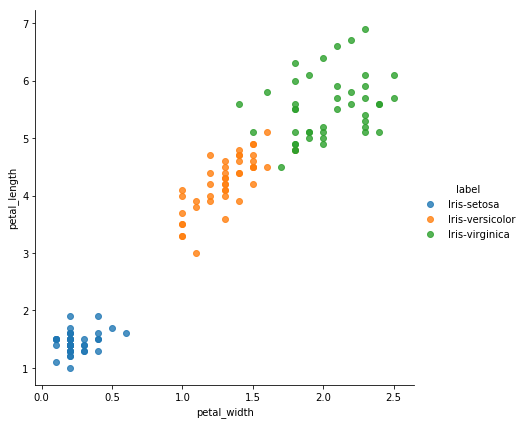

In [107]:
sns.lmplot(data=train_df,x="petal_width",y="petal_length",hue="label",fit_reg=False , size = 6)
#plt.vlines(x=potential_splits[3], ymin=1, ymax=7)# vertical line

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


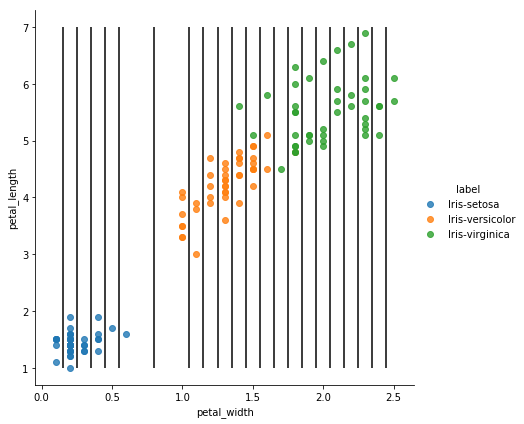

In [109]:
sns.lmplot(data=train_df,x="petal_width",y="petal_length",hue="label",fit_reg=False , size = 6)
plt.vlines(x=potential_splits[3], ymin=1, ymax=7)# vertical line
#plt.hlines(y=potential_splits[2], xmin=0, xmax=2.5)# horizontal line

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


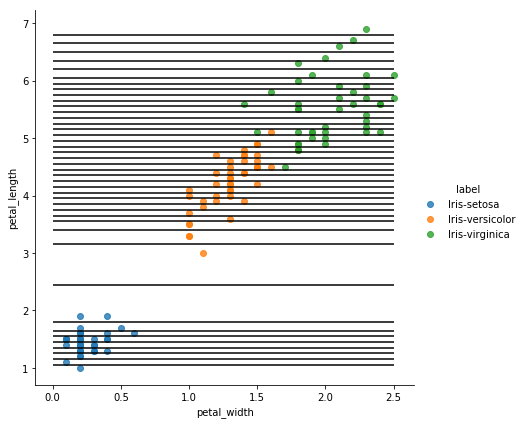

In [110]:
sns.lmplot(data=train_df,x="petal_width",y="petal_length",hue="label",fit_reg=False , size = 6)
#plt.vlines(x=potential_splits[3], ymin=1, ymax=7)# vertical line
plt.hlines(y=potential_splits[2], xmin=0, xmax=2.5)# horizontal line

### Split Data

In [10]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]
    
    # feature is categorical   
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    r
    return data_below, data_above

### Lowest Overall Entropy?

In [11]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [12]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [13]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

# Decision Tree Algorithm

### Representation of the Decision Tree

In [14]:
example_tree = {"petal_width <= 0.8": ["Iris-setosa", 
                                       {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor", 
                                                                                         "Iris-virginica"]}, 
                                                                "Iris-virginica"]}]}

### Determine Type of Feature

In [15]:
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

### Algorithm

In [16]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [17]:
tree = decision_tree_algorithm(train_df, max_depth=3)
pprint(tree)

{'petal_width <= 0.6': ['Iris-setosa',
                        {'petal_width <= 1.6': [{'petal_length <= 4.9': ['Iris-versicolor',
                                                                         'Iris-virginica']},
                                                'Iris-virginica']}]}


# Classification

In [18]:
example = test_df.iloc[0]
example

sepal_length                5.1
sepal_width                 2.5
petal_length                  3
petal_width                 1.1
label           Iris-versicolor
Name: 98, dtype: object

In [19]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [20]:
classify_example(example, tree)

'Iris-versicolor'

# Calculate Accuracy

In [21]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, args=(tree,), axis=1)
    df["classification_correct"] = df["classification"] == df["label"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [22]:
accuracy = calculate_accuracy(test_df, tree)
accuracy

0.95

# Titanic Data Set

### Load and Prepare Data

In [23]:
df = pd.read_csv("../data/Titanic.csv")
df["label"] = df.Survived
df = df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)

# handling missing values
median_age = df.Age.median()
mode_embarked = df.Embarked.mode()[0]

df = df.fillna({"Age": median_age, "Embarked": mode_embarked})

### Decision Tree Algorithm

In [24]:
random.seed(0)
train_df, test_df = train_test_split(df, 0.2)
tree = decision_tree_algorithm(train_df, max_depth=10)
accuracy = calculate_accuracy(test_df, tree)

pprint(tree, width=50)
accuracy

{'Sex = male': [{'Fare <= 9.4833': [{'Age <= 32.0': [{'Age <= 30.5': [{'Fare <= 7.7958': [{'Fare <= 7.7417': [{'Fare <= 7.2292': [{'Age <= 27.0': [{'Age <= 25.0': [0,
                                                                                                                                                                    1]},
                                                                                                                                                   0]},
                                                                                                                                  0]},
                                                                                                              {'Age <= 19.0': [0,
                                                                                                                               {'Age <= 21.0': [1,
                                                                                                    

0.7808988764044944